In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [50]:
df = pd.read_csv('./income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [51]:
df.drop('Name',axis=1,inplace=True)

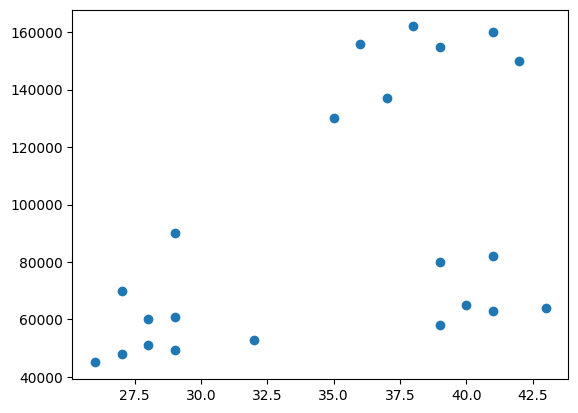

In [52]:
plt.scatter(df['Age'],df['Income($)']);

In [53]:
scala = MinMaxScaler().fit(df.values)
df = pd.DataFrame(scala.transform(df.values),columns=['Age','Income($)'])
df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


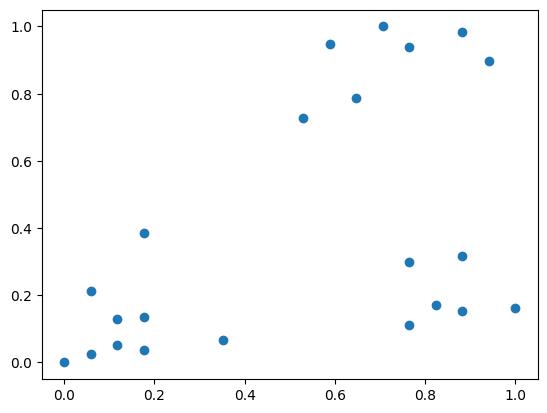

In [54]:
plt.scatter(df['Age'],df['Income($)']);

In [55]:
kmeans = KMeans(n_clusters=4,n_init=10).fit(df.values)
df['cluster'] = kmeans.labels_
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [56]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[0.85294118 0.2022792 ]
 [0.1372549  0.11633428]
 [0.82352941 0.95512821]
 [0.58823529 0.82051282]]
0.3491047094419566


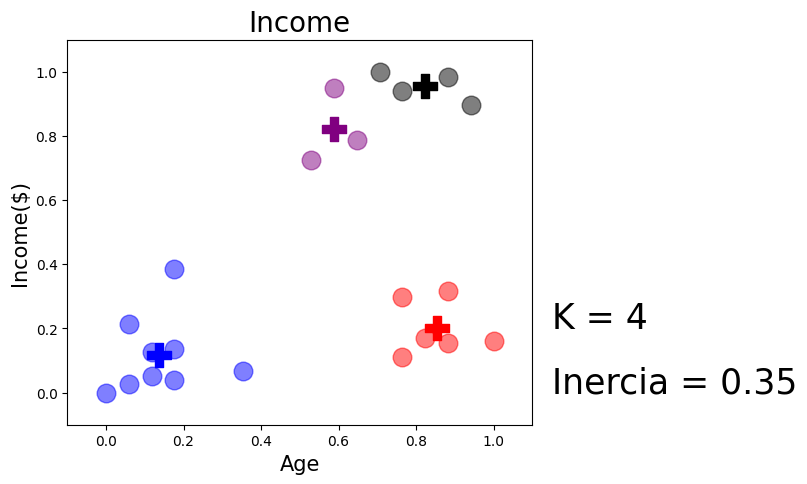

In [57]:
plt.figure(figsize=(6,5),dpi=100)
colores = ['red','blue','black','purple','pink','brown']

for cluster in range(kmeans.n_clusters):
  plt.scatter(df[df['cluster']==cluster]['Age'],
              df[df['cluster']==cluster]['Income($)'],
              marker='o',s=180,color=colores[cluster],alpha=0.5)

  plt.scatter(kmeans.cluster_centers_[cluster][0],
              kmeans.cluster_centers_[cluster][1],
              marker='P',s=280,color=colores[cluster])

plt.title('Income',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Income($)',fontsize=15)
plt.text(1.15,0.2,'K = %i' % kmeans.n_clusters,fontsize=25)
plt.text(1.15,0,'Inercia = %0.2f' % kmeans.inertia_,fontsize=25)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

### Calculo del numero de clusters (K)

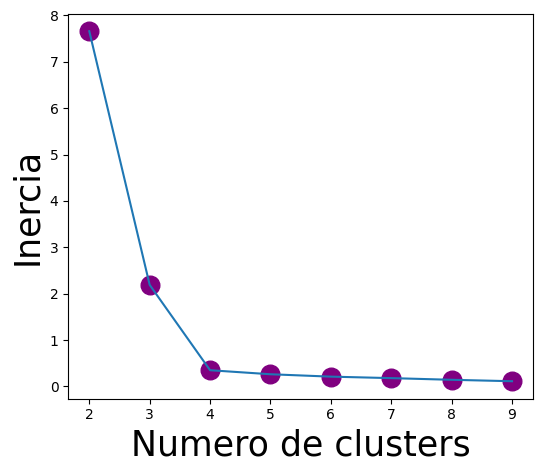

In [62]:
k_rng = range(2,10)
inercias = []
for k in k_rng:
  kmeans = KMeans(n_clusters=k,n_init=10).fit(df.values)
  inercias.append(kmeans.inertia_)

plt.figure(figsize=(6,5),dpi=100)
plt.scatter(k_rng,inercias,marker='o',s=180,color='purple')
plt.plot(k_rng,inercias)
plt.xlabel('Numero de clusters',fontsize=25)
plt.ylabel('Inercia',fontsize=25);